<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/22_3_Regression_with_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import datasets
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# https://www.kaggle.com/c/boston-housing

boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])

In [4]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


X
    # :Attribute Information (in order):
    #     - CRIM     per capita crime rate by town
    #     - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    #     - INDUS    proportion of non-retail business acres per town
    #     - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    #     - NOX      nitric oxides concentration (parts per 10 million)
    #     - RM       average number of rooms per dwelling
    #     - AGE      proportion of owner-occupied units built prior to 1940
    #     - DIS      weighted distances to five Boston employment centres
    #     - RAD      index of accessibility to radial highways
    #     - TAX      full-value property-tax rate per $10,000
    #     - PTRATIO  pupil-teacher ratio by town
    #     - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    #     - LSTAT    % lower status of the population

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [7]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Length: 404, dtype: float64

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(13, input_shape=(13,), activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))

# regression - no activation function in the last layer
model.add(Dense(1))

# in regression we use mse loss function
model.compile(optimizer='adam', loss='mse')

In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/13 [=>............................] - ETA: 0s - loss: 4129.7041WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002412D1370D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the 

Epoch 61/100
13/13 [==============================] - 0s 3ms/step - loss: 61.2633 - val_loss: 39.4816
Epoch 62/100
13/13 [==============================] - 0s 2ms/step - loss: 61.1924 - val_loss: 38.9300
Epoch 63/100
13/13 [==============================] - 0s 3ms/step - loss: 60.8619 - val_loss: 39.3151
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 60.7066 - val_loss: 39.0299
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 60.4507 - val_loss: 39.0667
Epoch 66/100
13/13 [==============================] - 0s 3ms/step - loss: 60.6012 - val_loss: 39.4910
Epoch 67/100
13/13 [==============================] - 0s 3ms/step - loss: 60.2050 - val_loss: 38.8687
Epoch 68/100
13/13 [==============================] - 0s 2ms/step - loss: 59.9660 - val_loss: 39.0087
Epoch 69/100
13/13 [==============================] - 0s 3ms/step - loss: 59.8850 - val_loss: 38.6237
Epoch 70/100
13/13 [==============================] - 0s 3ms/step - loss: 59.5920 

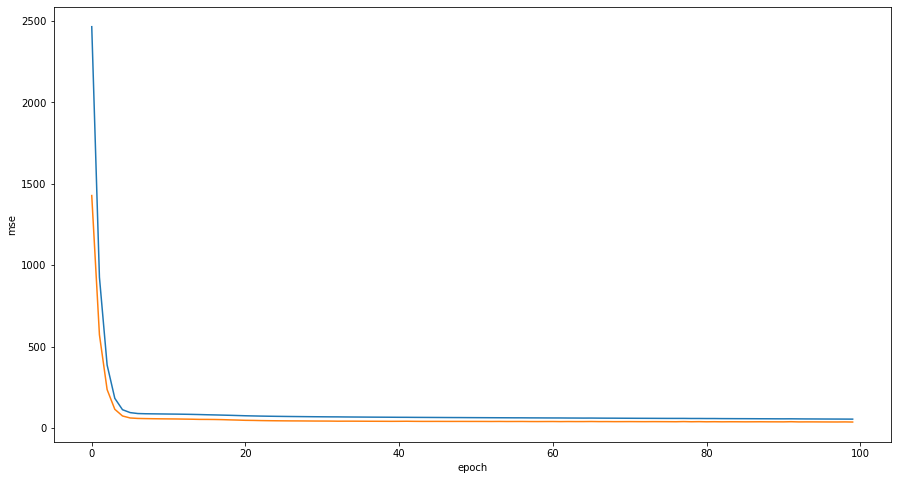

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))

plt.xlabel('epoch')
plt.ylabel('mse')

plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])

In [12]:
y_pred = model.predict(X_test)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [13]:
y_pred.shape

(102, 1)

In [14]:
y_test.shape

(102,)

In [15]:
y_df = pd.DataFrame({'pred':y_pred[:,0], 'true':y_test})

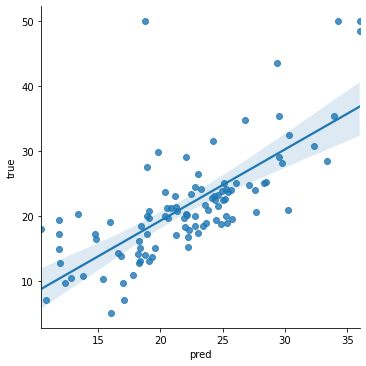

In [16]:
import seaborn as sns

sns.lmplot(x='pred', y='true', data = y_df)

In [17]:
y_df = y_df.sort_index()

<AxesSubplot:>

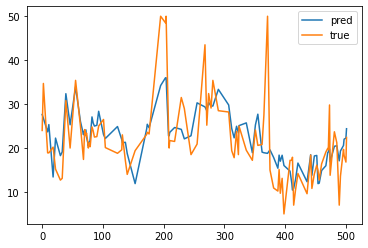

In [18]:
y_df.plot()